<a href="https://colab.research.google.com/github/ElchinNasirov/spam-email-classifier/blob/main/spam_email_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install scikit-learn pandas numpy matplotlib seaborn

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.model_selection import train_test_split  # For data split
from sklearn.linear_model import LogisticRegression  # For the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation
import matplotlib.pyplot as plt
import seaborn as sns  # For visualization

In [7]:
# Loading and Exploring the Dataset

# Loading the CSV (encoding for special chars)
df = pd.read_csv('spam.csv', encoding='latin-1')

print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [8]:
# Keeping relevant columns (v1: label, v2: text); drop others
df = df[['v1', 'v2']]
df.columns = ['label', 'text']  # Renaming for clarity

print(df)

     label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [9]:
# Converting labels to binary (0: ham/not-spam, 1: spam)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Exploring data (again)
print("Data shape:", df.shape)  # ~5572 rows, 2 columns
print(df.head())  # First 5 rows
print(df['label'].value_counts())  # Spam/ham count (imbalanced: ~13% spam)

Data shape: (5572, 2)
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
label
0    4825
1     747
Name: count, dtype: int64


In [10]:
# Preprocess Data

# Initializing vectorizer (limit to 3000 features to avoid too many)
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')  # Ignore common words like "the"

# Transforming text to vectors
X = vectorizer.fit_transform(df['text']).toarray()  # Array of word features
y = df['label']  # Labels

print("Feature shape:", X.shape)  # (5572, 3000)

Feature shape: (5572, 3000)


In [11]:
# Spliting into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state for reproducibility

In [12]:
# Building and Training the Model

# Initializing model (C=1.0 for moderate regularization; lower C = more reg to prevent overfitting)
model = LogisticRegression(C=1.0, max_iter=1000)  # max_iter for convergence

# Fit on train data
model.fit(X_train, y_train)

print("Model trained! Coefficients shape:", model.coef_.shape)  # (1, 3000) - weights for features

Model trained! Coefficients shape: (1, 3000)


In [13]:
# Predict labels
y_pred = model.predict(X_test)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.97      0.69      0.80       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



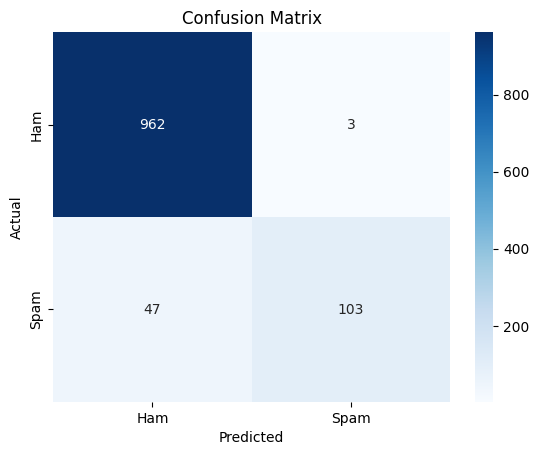

In [14]:
# Evaluate the Model

# Accuracy (fraction correct)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")  # ~0.95-0.97

# Detailed report (precision, recall, F1)
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
print("Classification Report:\n", report)

# Confusion matrix (TP/TN/FP/FN)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# New emails to test
new_emails = [
    "Free offer! Win a prize now!",  # Spam
    "Hey, let's meet tomorrow."  # Ham
]

# Vectorize and predict
new_X = vectorizer.transform(new_emails).toarray()  # Use same vectorizer
new_pred = model.predict(new_X)
print("Predictions:", ["Spam" if p == 1 else "Ham" for p in new_pred])

Predictions: ['Spam', 'Ham']
